# 

In [6]:
from Scripts.Make_logistic import *
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [7]:
df = pd.read_excel('Data/Clinical_synthetic.xlsx', index_col=0)
X,y=df.drop(['constrution_year', 'Area', 'floor_level', 'powerplant',
       'road', 'motorway', 'forest', 'coastline', 'airport', 'farmland',
       'industrial', 'carpet', 'cookerhood', 'passive', 'gastove', 'fireplace',
       'corrected_week','scale_formaldehyd', 'scale_acetald', 'scale_vocs',"scaled_vocs",
      'asthma_0_7yrs', 'verificeret_18y', 'verificeret_12y', 'crp_6mo', 'il_1β_6mo', 'il_8_6mo', 'il_6_6mo',
       'tnf_α_6mo', 'urti_1y', 'rti_1y', 'fever_1y', 'gi_1y',
       'any_1y', 'lrti_3yr', 'urti_3yr', 'rti_3yr', 'fever_3yr', 'gi_3yr',
       'any_3yr'],axis=1),df.verificeret_12y

In [9]:
performence,kernel,mcmc=nested_cross_baysian_logistic(X,y,2,3,"Models/asthma_adjusted_12_year_")

Sample: 100%|████████████████████████████████████████| 8000/8000 [05:44, 23.19it/s, step size=1.08e-01, acc. prob=0.953]
/data/michaelf/miniconda3/lib/python3.10/site-packages/arviz/data/io_pyro.py:158: UserWarning: Could not get vectorized trace, log_likelihood group will be omitted. Check your model vectorization or set log_likelihood=False
  warnings.warn(
posterior predictive shape not compatible with number of chains and draws.This can mean that some draws or even whole chains are not represented.
Sample: 100%|████████████████████████████████████████| 8000/8000 [04:33, 29.27it/s, step size=1.41e-01, acc. prob=0.920]
/data/michaelf/miniconda3/lib/python3.10/site-packages/arviz/data/io_pyro.py:158: UserWarning: Could not get vectorized trace, log_likelihood group will be omitted. Check your model vectorization or set log_likelihood=False
  warnings.warn(
posterior predictive shape not compatible with number of chains and draws.This can mean that some draws or even whole chains are n

In [ ]:
performence.to_excel("Models/performence_12_adjusted.xlsx")


Warmup:   2%|▊                                        | 159/8000 [00:30,  8.84it/s, step size=1.49e-01, acc. prob=0.774]

In [15]:
X.columns.shape

(21,)

In [17]:
list_parameters

['Indoor Acetald',
 'Indoor Acetone',
 'Indoor Formaldehyde',
 'Indoor $PM_{2.5}$',
 'Indoor $NO_x$',
 'Indoor $Black Carbon$',
 'Indoor $NO_2$',
 'Passive',
 'Lower resperatory Tract infections',
 'Polygenic Risk Score',
 'Gestational age',
 'Mother Education',
 'BMI 6 years',
 'Street $NO_2$',
 '$Street \\  No_x$',
 '$Street \\ PM_{2.5}$',
 '$Region \\ NO_x$',
 '$Region \\ NO_2$',
 '$Region \\ PM_{2.5}$Home PCA1',
 'Home PCA2']

In [3]:
asthma_1_exposure=az.from_json("Models/asthma_adjusted_12_year_00.json")
asthma_2_exposure=az.from_json("Models/asthma_adjusted_12_year_01.json")
asthma_3_exposure=az.from_json("Models/asthma_adjusted_12_year_10.json")
asthma_4_exposure=az.from_json("Models/asthma_adjusted_12_year_11.json")
asthma_5_exposure=az.from_json("Models/asthma_adjusted_12_year_20.json")
asthma_6_exposure=az.from_json("Models/asthma_adjusted_12_year_21.json")
asthma=az.concat(asthma_1_exposure,asthma_2_exposure,asthma_3_exposure,asthma_4_exposure,asthma_5_exposure,asthma_6_exposure, dim="chain")

In [4]:
asthma["posterior"]["weight"]=np.exp(asthma["posterior"]["weight"])

asthma.posterior = asthma.posterior.assign_coords(
    weight_dim_0=X.columns
)
asthma.to_netcdf("Models/asthma_adjusted_12y.nc")
#asthma.to_zarr("Models/asthma_adjusted_18y.zarr")

'Models/asthma_adjusted_12y.nc'

In [5]:
asthma

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

In [6]:
np.arange(21)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [7]:
asthma["posterior"]["weight_dim_0"].values


array(['Indoor Acetald', 'Indoor Acetone', 'Indoor formaldehyd',
       'Indoor $PM_{2.5}$', 'Indoor $NO_x$', 'Indoor black Carbon',
       'Indoor $NO_2$', 'Passive', 'LRTI', 'Polygentic risk Score',
       'Gestational age', 'Mothers Education', 'BMI', 'Street $NO_2$',
       'Street $NO_x$', 'Street $PM_{2.5}$', 'Regional $NO_x$',
       'Regional $NO_2 $', 'Regional $PM_{2.5}$', 'landuse1', 'landuse2'],
      dtype='<U21')

In [8]:
asthma.rename_vars(dict(zip(np.arange(21),list_parameters)))


Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

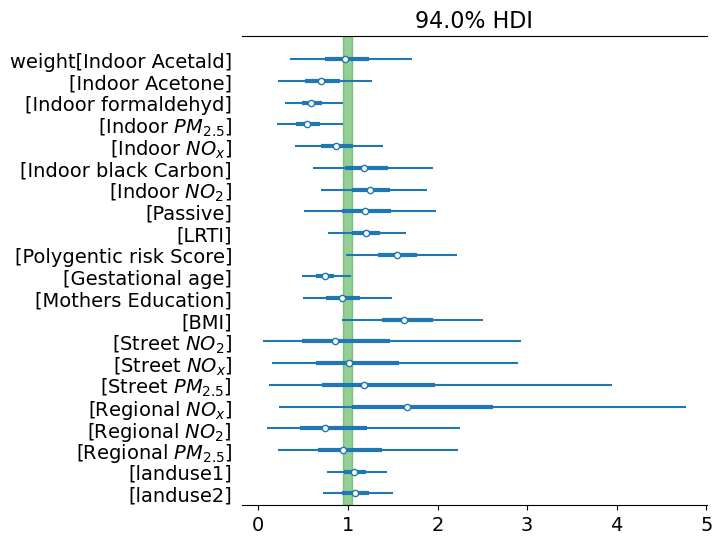

In [9]:
ax = az.plot_forest(
    [asthma], var_names="weight",rope=[0.95,1.05],combined=True)